In [1]:
import numpy as np 
import corner as DFM
from sklearn.mixture import GaussianMixture as GMix
from scipy.stats import multivariate_normal as MNorm
# -- local -- 
import env
import catalogs as Cats
from fstarforms import fstarforms

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
Cat = Cats.Catalog()
_logM, _logSFR, w, censat = Cat.Read('illustris_100myr')
iscen = (censat == 1)
logM = _logM[iscen]
logSFR = _logSFR[iscen]
SFR = 10**logSFR
#logSFR_err = 0.434*(2.e-2)/(10.**logSFR)

/Users/chang/projects/LetsTalkAboutQuench/letstalkaboutquench/catalogs.py:71: RuntimeWarning: divide by zero encountered in log10
  logSFR = np.log10(_ssfr) + logM # calculate log SFR from sSFR

------ illustris_100myr ------
16943 of 66808 galaxies have 0/non-finite SFRs
logSFR of these galaxies will be -999.


In [4]:
def realCat(seed):
    ''' Return log M and log SFR of catalog realization where
    log SFR is scattered based on the star particle mass
    '''
    np.random.seed(seed)
    SFR_i = SFR + 0.016 * 2 * np.random.uniform(size=len(SFR)) 
    return logM, np.log10(SFR_i)

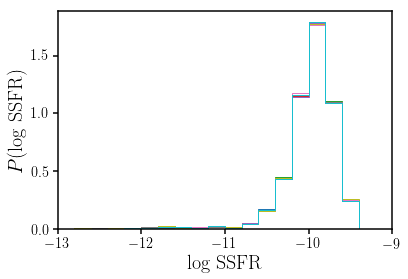

In [5]:
fig = plt.figure()
sub = fig.add_subplot(111)
for i in range(10): 
    logm_i, logsfr_i = realCat(i)
    mlim = (logm_i > 10.) & (logm_i < 10.2)
    a = sub.hist(logsfr_i[mlim] - logm_i[mlim], 
                 bins=20, range=[-13., -9], 
                 normed=True, histtype='step', linewidth=1)
sub.set_xlabel(r'$\log$ SSFR', fontsize=20)
sub.set_xlim([-13., -9.])
sub.set_ylabel(r'$P(\log\,\mathrm{SSFR})$', fontsize=20)

In [14]:
n_mock = 100

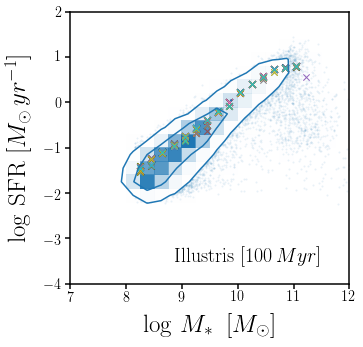

In [17]:
fSFMS = fstarforms()

fig = plt.figure(1, figsize=(5,5))
sub = fig.add_subplot(111)
DFM.hist2d(logM, logSFR, color='C0', alpha=0.5, levels=[0.68, 0.95], range=[[7., 12.], [-4., 2.]], 
               plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub) 
for i in range(n_mock): 
    logm_i, logsfr_i = realCat(i)
    fit_logm, fit_logsfr = fSFMS.fit(logm_i, logsfr_i, method='gaussmix', silent=True) 
    sub.scatter(fit_logm, fit_logsfr, c='C'+str(i % 10), marker='x', lw=1, s=40)
sub.set_xlabel(r'log $M_* \;\;[M_\odot]$', labelpad=10, fontsize=25) 
sub.set_ylabel(r'log SFR $[M_\odot \, yr^{-1}]$', labelpad=10, fontsize=25) 
sub.text(0.9, 0.1, r'Illustris [$100\,Myr$]', ha='right', va='center', transform=sub.transAxes, fontsize=20)

44 16


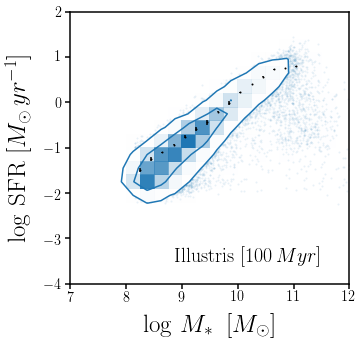

In [22]:
fig = plt.figure(1, figsize=(5,5))
sub = fig.add_subplot(111)
DFM.hist2d(logM, logSFR, color='C0', alpha=0.5, levels=[0.68, 0.95], range=[[7., 12.], [-4., 2.]], 
               plot_datapoints=True, fill_contours=False, plot_density=True, ax=sub) 
fit_logsfrs = []
for i in range(n_mock): 
    logm_i, logsfr_i = realCat(i)
    fit_logm, fit_logsfr = fSFMS.fit(logm_i, logsfr_i, method='gaussmix', silent=True) 
    if i == 0: l0 = len(fit_logm)
    if len(fit_logsfr) != l0: 
        print i, len(fit_logsfr)
    else: 
        fit_logsfrs.append(fit_logsfr)
fit_logsfrs = np.array(fit_logsfrs)

sub.errorbar(fit_logm, np.mean(fit_logsfrs, axis=0), yerr=np.std(fit_logsfrs, axis=0), fmt='.k', markersize=2)
sub.set_xlabel(r'log $M_* \;\;[M_\odot]$', labelpad=10, fontsize=25) 
sub.set_ylabel(r'log SFR $[M_\odot \, yr^{-1}]$', labelpad=10, fontsize=25) 
sub.text(0.9, 0.1, r'Illustris [$100\,Myr$]', ha='right', va='center', transform=sub.transAxes, fontsize=20)

In [23]:
print np.std(fit_logsfrs, axis=0).max()

0.0624856745915
